In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, peak_prominences, peak_widths

In [8]:
""" Pull Data """
ch1data = pd.read_csv("inputFiles/output4partCh1.txt", sep="\t")
ch4data = pd.read_csv("inputFiles/output4partCh4.txt", sep="\t")

ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

In [99]:
""" Find Peaks & View Response """
# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Trucate to similar size
ch1 = ch1.truncate(after=1000)
ch4 = ch4.truncate(after=1250)

# Pull columns 
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

In [133]:
""" Peaks """
# Pull Peak index and values
peakindexCH1, _ = find_peaks(ch1V, distance=5, height= 1)
peakindexCH4, _ = find_peaks(ch4V, distance=5, height= 1)
peaksCH1 = ch1V[peakindexCH1]
peaksCH4 = ch4V[peakindexCH4]

print(f"CH1\nindex:\t\t {peakindexCH1} \nValue (V):\t{peaksCH1} \nTime (t): \t{ch1t[peakindexCH1]}")
print(f"\nCH4\nindex:\t\t {peakindexCH4} \nValue (V):\t{peaksCH4} \nTime (t): \t{ch4t[peakindexCH4]}")

""" TOF """
Tof = ch4t[peakindexCH4] -ch1t[peakindexCH1]
print(f"\nTime of Flight\n - calculated by taking the peak indicies then taking a difference of the respective time values\n{Tof}")


CH1
index:		 [ 68 373 626 878] 
Value (V):	[1.735204 1.291867 1.517691 1.553245] 
Time (t): 	[3.83863037e-09 1.00335832e-06 2.00377106e-06 3.00375623e-06]

CH4
index:		 [  90  452  807 1179] 
Value (V):	[1.916791 1.30312  1.383337 1.219886] 
Time (t): 	[6.52379877e-09 1.00559540e-06 2.00577880e-06 3.00572233e-06]

Time of Flight
 - calculated by taking the peak indicies then taking a difference of the respective time values
[2.68516840e-09 2.23708519e-09 2.00774455e-09 1.96610475e-09]


<Axes: xlabel='Time'>

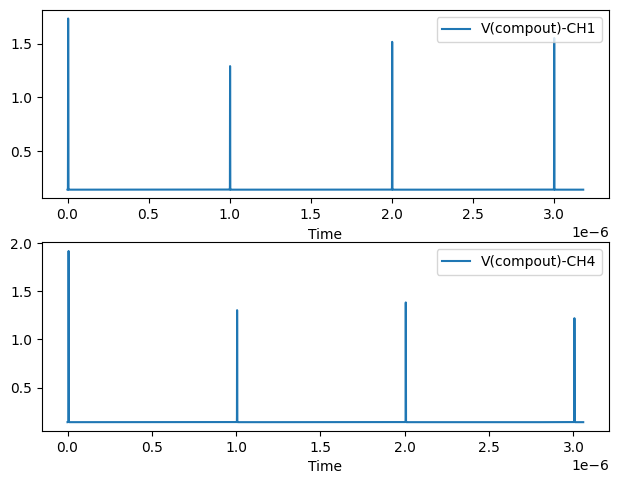

In [100]:
""" Plots using Data Frame"""
fig, ax = plt.subplots(2,1)
fig.tight_layout()
ch1.plot(x="Time", y="V(compout)-CH1", ax=ax[0])
ch4.plot(x="Time", y="V(compout)-CH4", ax=ax[1])